In [103]:
import pandas as pd
df = pd.read_excel('/content/Cleaned_DF.xlsx')
df.head()

,Log Date,site Name,Turbine Code,Cluster Name,Gen.Units,AVG WindSpd,WTG Fault,PM ShutDown,MMA,Grid Availability,...,COLORCODE2,STATUSMSG3,COLORCODE3,month_year,custom_sort,Total_Fault,days_in_month,error_count,month,year
0,2020-04-01,AgadGaon,TPCAG-01,1-Agadgaon,983,3.9,0.0,0.0,100.0,92.080002,...,NaN,NaN,NaN,Apr-2020,202004,0.0,30,0,4,2020
1,2020-04-01,AgadGaon,TPCAG-02,1-Agadgaon,813,3.8,0.0,0.0,100.0,92.080002,...,NaN,NaN,NaN,Apr-2020,202004,0.0,30,0,4,2020
2,2020-04-01,AgadGaon,TPCAG-03,1-Agadgaon,1368,4.2,0.0,0.0,100.0,92.849998,...,NaN,NaN,NaN,Apr-2020,202004,0.0,30,0,4,2020
3,2020-04-01,AgadGaon,TPCAG-04,1-Agadgaon,1406,4.1,0.0,0.0,100.0,92.849998,...,NaN,NaN,NaN,Apr-2020,202004,0.0,30,0,4,2020
4,2020-04-01,AgadGaon,TPCAG-05,1-Agadgaon,1754,3.8,0.0,0.0,100.0,100.000000,...,NaN,NaN,NaN,Apr-2020,202004,0.0,30,0,4,2020


In [104]:
new_df = df[['Log Date','Gen.Units',
       'AVG WindSpd', 'WTG Fault', 'PM ShutDown', 'MMA', 'Grid Availability',
       'Capacity Factor']]
new_df.head()

,Log Date,Gen.Units,AVG WindSpd,WTG Fault,PM ShutDown,MMA,Grid Availability,Capacity Factor
0,2020-04-01,983,3.9,0.0,0.0,100.0,92.080002,5.12
1,2020-04-01,813,3.8,0.0,0.0,100.0,92.080002,4.23
2,2020-04-01,1368,4.2,0.0,0.0,100.0,92.849998,7.13
3,2020-04-01,1406,4.1,0.0,0.0,100.0,92.849998,7.32
4,2020-04-01,1754,3.8,0.0,0.0,100.0,100.000000,9.14


In [105]:
# Group by 'Date' and aggregate
grouped_df = new_df.groupby('Log Date').agg({
    'Gen.Units': 'sum',       # Sum of Sales for each date
    'AVG WindSpd': 'mean',
    'WTG Fault': 'sum',
    'PM ShutDown': 'sum',
    'MMA': 'mean',
    'Grid Availability': 'mean',
    'Capacity Factor': 'mean'
    # Mean of Quantity for each date
}).reset_index()
grouped_df.head()

,Log Date,Gen.Units,AVG WindSpd,WTG Fault,PM ShutDown,MMA,Grid Availability,Capacity Factor
0,2020-04-01,107889,3.858730,0.350000,0.0,99.976825,98.692698,8.920159
1,2020-04-02,127978,4.425397,7.883333,0.0,99.478571,99.456825,10.580318
2,2020-04-03,137558,4.720635,6.283333,0.0,99.584603,100.000000,11.372540
3,2020-04-04,128363,4.417460,5.333333,0.0,99.647143,100.000000,10.612381
4,2020-04-05,184724,5.073016,4.600000,0.0,99.695873,94.865079,15.271429


In [106]:
grouped_df['Log Date'] = pd.to_datetime(grouped_df['Log Date'], format='%d/%m/%Y')

# Proceed with extracting month and year as shown above
grouped_df['Month'] = grouped_df['Log Date'].dt.month
grouped_df['Year'] = grouped_df['Log Date'].dt.year
grouped_df['Month_Year'] = grouped_df['Log Date'].dt.to_period('M')
grouped_df.head()

,Log Date,Gen.Units,AVG WindSpd,WTG Fault,PM ShutDown,MMA,Grid Availability,Capacity Factor,Month,Year,Month_Year
0,2020-04-01,107889,3.858730,0.350000,0.0,99.976825,98.692698,8.920159,4,2020,2020-04
1,2020-04-02,127978,4.425397,7.883333,0.0,99.478571,99.456825,10.580318,4,2020,2020-04
2,2020-04-03,137558,4.720635,6.283333,0.0,99.584603,100.000000,11.372540,4,2020,2020-04
3,2020-04-04,128363,4.417460,5.333333,0.0,99.647143,100.000000,10.612381,4,2020,2020-04
4,2020-04-05,184724,5.073016,4.600000,0.0,99.695873,94.865079,15.271429,4,2020,2020-04


In [107]:
# Step 3: Set the 'Date' Column as the Index
grouped_df.set_index('Log Date', inplace=True)
monthly_grouped = grouped_df.groupby('Month_Year').agg({'Gen.Units': 'sum', 'AVG WindSpd': 'mean', 'WTG Fault': 'sum', 'PM ShutDown': 'sum', 'MMA': 'mean', 'Grid Availability': 'mean', 'Capacity Factor': 'mean'})
monthly_grouped

,Gen.Units,AVG WindSpd,WTG Fault,PM ShutDown,MMA,Grid Availability,Capacity Factor
Month_Year,,,,,,,
2020-04,5239867,4.929524,213.450000,90.950000,99.328942,97.435397,14.439815
2020-05,9055621,6.198618,274.416667,307.516667,98.758495,94.431941,24.149995
2020-06,7413322,5.106402,444.716667,200.716667,98.577116,94.948899,20.429392
2020-07,9123785,5.673682,338.966667,82.416667,99.101004,98.490584,24.331818
2020-08,20562571,8.274040,325.350000,46.633333,99.155218,99.195991,54.837061
2020-09,4128381,4.466138,454.250000,38.550000,98.913577,99.192423,11.377101
2020-10,4171059,4.428264,486.383333,89.266667,98.771889,96.758218,11.123953
2020-11,6528634,5.213757,132.566667,77.133333,99.537730,99.616899,17.991280
2020-12,4806702,4.663390,136.533333,37.083333,99.629601,98.759995,12.819002


In [108]:
monthly_grouped = monthly_grouped.reset_index()
monthly_grouped.head()

,Month_Year,Gen.Units,AVG WindSpd,WTG Fault,PM ShutDown,MMA,Grid Availability,Capacity Factor
0,2020-04,5239867,4.929524,213.450000,90.950000,99.328942,97.435397,14.439815
1,2020-05,9055621,6.198618,274.416667,307.516667,98.758495,94.431941,24.149995
2,2020-06,7413322,5.106402,444.716667,200.716667,98.577116,94.948899,20.429392
3,2020-07,9123785,5.673682,338.966667,82.416667,99.101004,98.490584,24.331818
4,2020-08,20562571,8.274040,325.350000,46.633333,99.155218,99.195991,54.837061


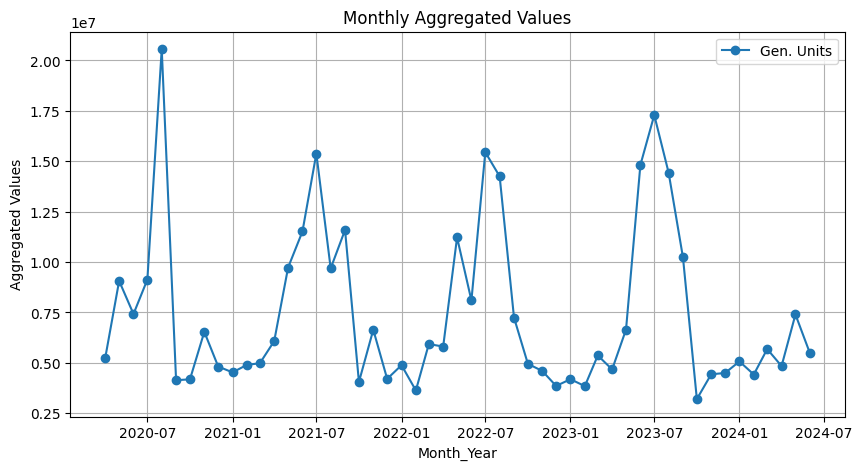

In [109]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
monthly_grouped = monthly_grouped.set_index('Month_Year')
# Plotting sum of 'Value' per month
plt.plot(monthly_grouped.index.to_timestamp(), monthly_grouped['Gen.Units'], label='Gen. Units', marker='o')
plt.title('Monthly Aggregated Values')
plt.xlabel('Month_Year')
plt.ylabel('Aggregated Values')
plt.legend()
plt.grid(True)
plt.show()

In [110]:
monthly_grouped = monthly_grouped.reset_index()
monthly_grouped.head()

,Month_Year,Gen.Units,AVG WindSpd,WTG Fault,PM ShutDown,MMA,Grid Availability,Capacity Factor
0,2020-04,5239867,4.929524,213.450000,90.950000,99.328942,97.435397,14.439815
1,2020-05,9055621,6.198618,274.416667,307.516667,98.758495,94.431941,24.149995
2,2020-06,7413322,5.106402,444.716667,200.716667,98.577116,94.948899,20.429392
3,2020-07,9123785,5.673682,338.966667,82.416667,99.101004,98.490584,24.331818
4,2020-08,20562571,8.274040,325.350000,46.633333,99.155218,99.195991,54.837061


In [111]:
# Adding '-01' to ensure the first day of the month
monthly_grouped['Month_Year'] = monthly_grouped['Month_Year'].astype(str)
monthly_grouped['Date'] = pd.to_datetime(monthly_grouped['Month_Year'] + '-01')

In [112]:
monthly_grouped = monthly_grouped.set_index('Date')
gen_df = monthly_grouped[['Gen.Units']]
gen_df.head()

,Gen.Units
Date,
2020-04-01,5239867
2020-05-01,9055621
2020-06-01,7413322
2020-07-01,9123785
2020-08-01,20562571


In [113]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 2020-04-01 to 2024-06-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Gen.Units  51 non-null     int64
dtypes: int64(1)
memory usage: 816.0 bytes


<Axes: xlabel='Date'>

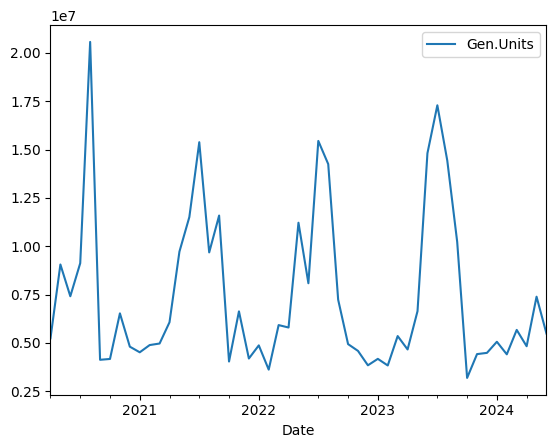

In [114]:
gen_df.plot()

Stationary data : It refers toa time series whose statistical properties such as mean, variance and autocorrelation are constant over time. The Data does not exibits trends, seasonality or oter non-constant beaviour.

ADF test is used to check stationarity ofthe data where null hypothesis is - the data is nonstationary.

Making a time series stationary:

If a time series is not stationary, it can often be transformed to achieve stationarity. Common techniques include:

Differencing: Subtracting the previous observation from the current observation. This is a common method to remove trends.

Log Transformation: Applying a logarithm to stabilize the variance.

Seasonal Differencing: Subtracting the value from the same season in the previous cycle to remove seasonality.

Detrending: Removing a trend component, often by fitting and subtracting a trend line.

removing trend and seasonality from the series are common method to make a time series stationary.


In [115]:
#Testing for stationarity

from statsmodels.tsa.stattools import adfuller
result = adfuller(gen_df['Gen.Units'])

#H0: The data is non-stationary. (null hypothesis)
#H1: The data is stationary.  (alternate hypothesis)

def adfuller_test(data_column):
    result=adfuller(data_column)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
      print(label+' : '+str(value))

    if result[1] <= 0.05:
      print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
      print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")



In [116]:
#testing adfuller test to gen. units column
adfuller_test(gen_df['Gen.Units'])

ADF Test Statistic : -4.978973161933825
p-value : 2.4420921315165292e-05
#Lags Used : 9
Number of Observations Used : 41
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Autocorrelation Plot : It is a toll which is used to show te correlation of a time series with its own lagged values. It is used to identify the patterns or relationsip within the data over different timelags.

X axis represents different time lags, y-axis represents te autocorrelation coefficient, wich measures the strength and direction of the relationship between te time series and its lagged values.

Horizontal lines are drawn around zero to indicate the confidance intervals. These are typically aet at 95% confidance interval levels. If te autocorrelation values for a specific lag falls outside tese bounds, it is considered statistically significant.

if most of the autocorrelation coeficients lies within the confidence interval, the series is likely to be white noise, means there is no significant pattern.

If there are significant peaks at specific lags, it indicates a repeating pattern or cyclic behavior in the time series.

A gradual decline in the autocorrelation coefficients suggests that the time series may have a trend component.

A sudden drop to near zero after a certain lag indicates a short-term dependency, which can be modeled using an autoregressive process.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

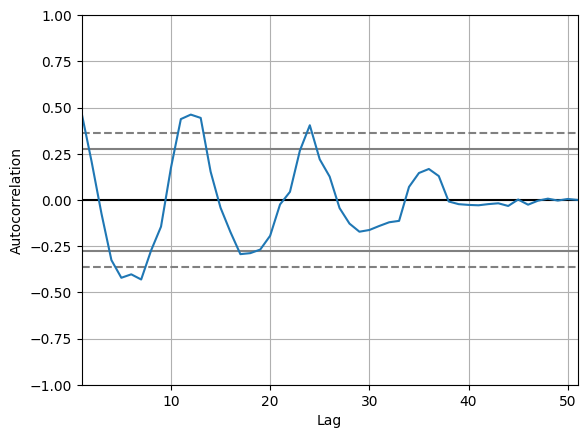

In [117]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(gen_df['Gen.Units'])

#Here if most of the autocorrelation coeficients lies within the confidence interval,
#the series is likely to be white noise, means there is no significant pattern. So the series is stationary.

Identifying the p,d & q values for ARIMA Model:

AR(p) :Look at te PACF Plot. The lag, after which te PACF cuts off (drops near to 0), that indicated the value of p

MA(q) :Lokk at the ACF plot. The lag after wicthe ACF cuts off indicates the value of q.

degree of differencing (d) :How many differencing is done to make the data stationary.

Model selection criteria : Use criterions like AIC and BIC to compare the models. Lower values of AIC or BIC indicates abetter fitting model.

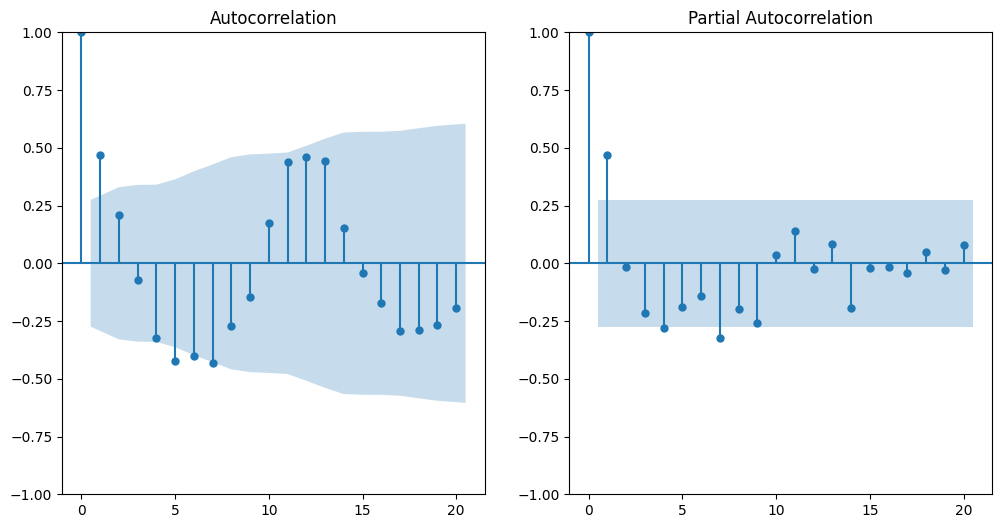

In [118]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(gen_df['Gen.Units'], lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(gen_df['Gen.Units'], lags=20, ax=plt.gca())
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1774.260, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1702.680, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1748.858, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1702.850, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1702.918, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1704.891, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1690.919, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1701.513, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1692.911, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1692.981, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1693.985, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1694.908, Time=0.10 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.509 seconds
                               SARIMAX Results                                
Dep. Vari

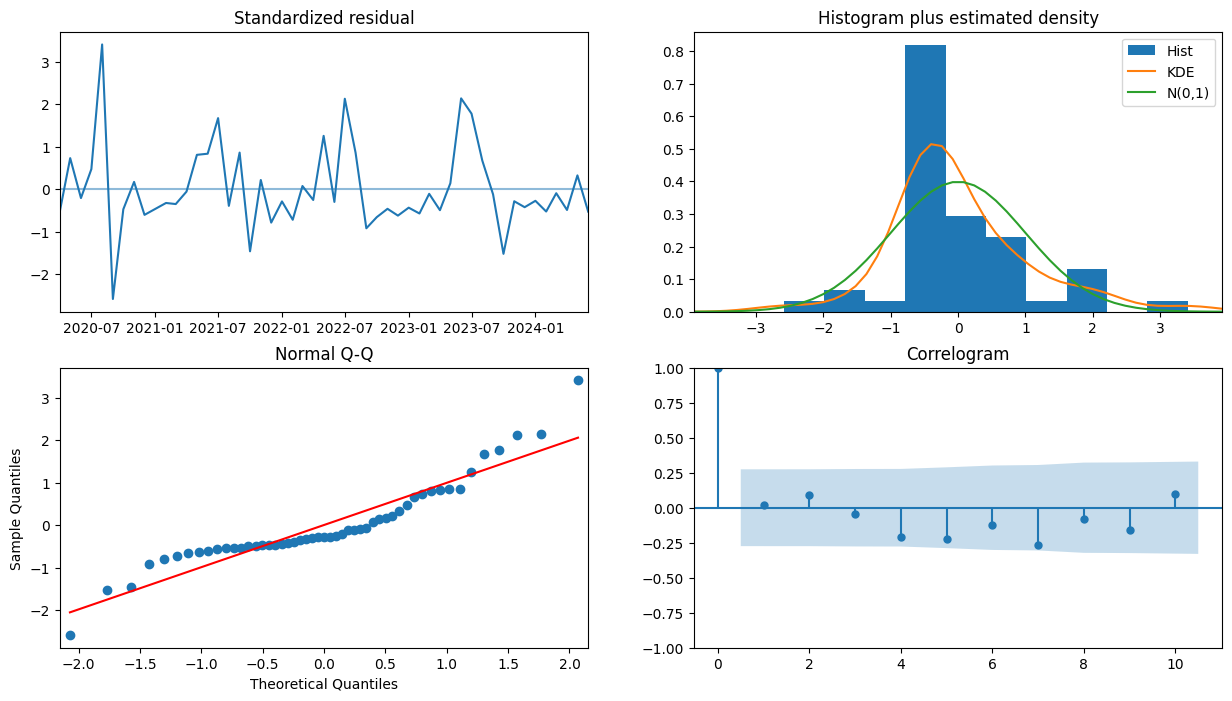

In [119]:
#Using pmdarima library to find out p, d & q
!pip install pmdarima
import pmdarima as pm
series = gen_df['Gen.Units']

# Fit the auto_arima model
model = pm.auto_arima(series,
                      start_p=0, start_q=0,
                      max_p=5, max_q=5,
                      seasonal=False, # Change to True if your data has a seasonal component
                      stepwise=True,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      D=1,
                      max_d=2,
                      max_order=None,
                      information_criterion='aic')

# Print the model summary
print(model.summary())

# Plot diagnostics
model.plot_diagnostics(figsize=(15, 8))
plt.show()

#from this model we can conclude the values of P=1, d=0 ,q=0

In [128]:
train = gen_df.iloc[:-15]
test = gen_df.iloc[-15:]
print(train.shape,test.shape)


(36, 1) (15, 1)


In [129]:
from statsmodels.tsa.arima.model import ARIMA
model1 = ARIMA(train['Gen.Units'], order=(1, 0, 0))
model_fit = model1.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Gen.Units   No. Observations:                   36
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -595.804
Date:                Wed, 10 Jul 2024   AIC                           1197.608
Time:                        11:29:46   BIC                           1202.358
Sample:                    04-01-2020   HQIC                          1199.266
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.427e+06   1.15e+06      6.474      0.000    5.18e+06    9.68e+06
ar.L1          0.3506      0.139      2.515      0.012       0.077       0.624
sigma2      1.411e+13      0.412   3.43e+13      0.000    1.41e+13    1.41e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                16.21
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                             1.20
Prob(H) (two-sided):                  0.27   Kurtosis:                         5.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.37e+28. Standard errors may be unstable.
"""

In [130]:
#making predictions on test set
start = len(train)
end = len(train) + len(test) - 1
predictions = model_fit.predict(start =start, end= end,typ='levels')
predictions

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2023-04-01    6.700925e+06
2023-05-01    7.172758e+06
2023-06-01    7.338167e+06
2023-07-01    7.396153e+06
2023-08-01    7.416481e+06
2023-09-01    7.423608e+06
2023-10-01    7.426106e+06
2023-11-01    7.426982e+06
2023-12-01    7.427289e+06
2024-01-01    7.427396e+06
2024-02-01    7.427434e+06
2024-03-01    7.427447e+06
2024-04-01    7.427452e+06
2024-05-01    7.427454e+06
2024-06-01    7.427454e+06
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='Date'>

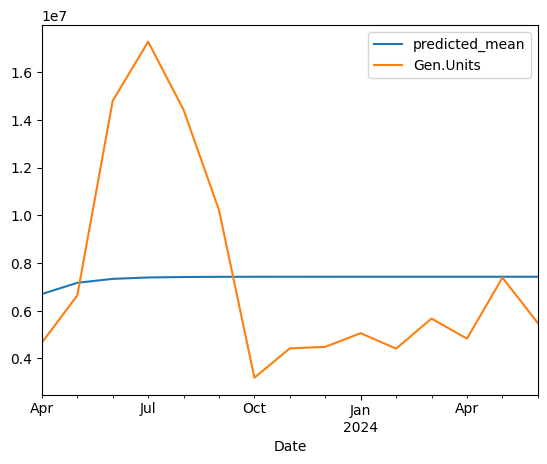

In [131]:
predictions.plot(legend=True)
test['Gen.Units'].plot(legend=True)

In [120]:
# from statsmodels.tsa.arima.model import ARIMA
# model1 = ARIMA(gen_df['Gen.Units'], order=(1, 0, 1))
# model_fit1 = model1.fit()
# model_fit1.summary()

In [121]:
# gen_df['forecast'] = model_fit1.predict(start=0, end=len(gen_df)-1)
# gen_df[['Gen.Units', 'forecast']].plot(figsize=(12, 6))

In [122]:
# #Applying seasonal ARIMA

# from statsmodels.tsa.statespace.sarimax import SARIMAX
# model2 = SARIMAX(gen_df['Gen.Units'], order=(1, 0, 0), seasonal_order=(1, 0,0,12))
# model_fit2 = model2.fit()
# model_fit2.summary()

# gen_df['forecast_sarimax'] = model_fit2.predict(start=0, end=len(gen_df)-1)
# gen_df[['Gen.Units', 'forecast', 'forecast_sarimax']].plot(figsize=(12, 6))

# Applying model for future prediction.

In [123]:
# from pandas.tseries.offsets import DateOffset
# future_dates = [gen_df.index[-1] + DateOffset(months=x) for x in range(0,24)]
# future_dates_df = pd.DataFrame(index=future_dates[1:], columns=gen_df.columns)
# future_df = pd.concat([gen_df, future_dates_df])
# future_df['forecast_sarimax'] = model_fit1.predict(start=len(gen_df), end=len(gen_df)+23)
# future_df[['Gen.Units', 'forecast_sarimax']].plot(figsize=(12, 6))

In [124]:
# future_df

In [125]:
# gen_df